In [1]:
# Importing Qiskit and IonQ accounts
from qiskit import IBMQ
from qiskit_ionq import IonQProvider

# Loading your IBM Quantum and IonQ accounts
# IBMQ.save_account('token')
IBMQ.load_account()
ibmq_provider = IBMQ.get_provider('ibm-q')
# ibmq_provider = IBMQ.get_provider('ibm-q-skku','yonsei-uni','yu-students')
# ionq_provider = IonQProvider("")

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info.operators import Operator
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from staggered_dsg_circuit_3t_un import *

In [3]:
size_degree = 2
shots = 4000

displacement_dict = {"000000001":0, "000000010":1, "000000100":1, 
                     "000001000":9, "000010000":7, "000100000":4,
                     "001000000":9, "010000000":4, "100000000":7}

In [4]:
sys = 'ibmq_qasm_simulator'
sim = ibmq_provider.get_backend(sys)

In [5]:
steps = 300
dt = 0.01
layers = 10
t = np.linspace(dt, steps*dt, steps)
name = f'dsg_3tqw_un_o{size_degree:d}_{steps*dt:.1f}s_{layers:d}ly'

In [6]:
circs = []

# Build a circuit list.
for i in range(steps):
    circs.append(staggered_dsg_circuit_3t_un(size_degree, t[i], layers, model='Heisenberg'))

# circs[20].draw('mpl')

# Need to transpile the circuits first.
transpiled_circs = transpile(circs, backend=sim, optimization_level=2)

# Use Job Manager to break the circuits into multiple jobs.
job_manager = IBMQJobManager()
job_set = job_manager.run(transpiled_circs, backend=sim, name=sys+'_'+name, shots=shots)

In [7]:
results = job_set.results()
counts_list = list()
for i in range(steps):
    counts_list.append(results.get_counts(i))

In [8]:
msd_temp = 0.
msd_list = list()

for i in range(steps):
    msd_temp = 0.
    for bit, count in counts_list[i].items():
        msd_temp += displacement_dict.get(bit)*count/shots
    msd_list.append(msd_temp)

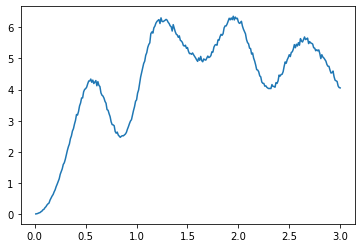

In [9]:
plt.plot(t, msd_list)

In [10]:
import pickle

with open('simulator/'+sys+'_'+name+'_counts_list.pkl','wb') as file :
    pickle.dump(counts_list, file)

In [11]:
import csv

with open('simulator/'+sys+'_'+name+'_msd_list.csv','w') as file :
    write = csv.writer(file)
    write.writerow(msd_list)

In [5]:
sys = 'ibm_hanoi'
backend = ibmq_provider.get_backend(sys)

In [6]:
steps = 300
dt = 0.01
layers = 2
t = np.linspace(dt, steps*dt, steps)
name = f'dsg_3tqw_un_o{size_degree:d}_{steps*dt:.1f}s_{layers:d}ly'

In [7]:
circs = []

# Build a circuit list.
for i in range(steps):
    circs.append(staggered_dsg_circuit_3t_un(size_degree, t[i], layers))

# Need to transpile the circuits first.
transpiled_circs = transpile(circs, backend=backend, optimization_level=2)

# Use Job Manager to break the circuits into multiple jobs.
job_manager = IBMQJobManager()
job_set = job_manager.run(transpiled_circs, backend=backend, name=sys+'_'+name, shots=shots)

In [8]:
results = job_set.results()
counts_list = list()
for i in range(steps):
    counts_list.append(results.get_counts(i))

In [9]:
msd_list = list()

for i in range(steps):
    valid_count = 0
    for bit, count in counts_list[i].items():
        valid_count += (displacement_dict.get(bit, -1) > -1)*count
    msd_temp = 0.
    for bit, count in counts_list[i].items():
        msd_temp += displacement_dict.get(bit, 0)*count/valid_count
    msd_list.append(msd_temp)

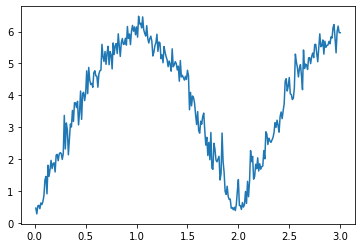

In [10]:
plt.plot(t, msd_list)

In [11]:
import pickle

with open('qpu/'+sys+'_'+name+'_counts_list.pkl','wb') as file :
    pickle.dump(counts_list, file)

In [12]:
import csv

with open('qpu/'+sys+'_'+name+'_msd_list.csv','w') as file :
    write = csv.writer(file)
    write.writerow(msd_list)

In [ ]:
sys = 'ionq_simulator'
backend = ionq_provider.get_backend(sys)

In [ ]:
steps = 300
dt = 0.01
layers = 2
t = np.linspace(dt, steps*dt, steps)
name = f'dsg_3tqw_un_o{size_degree:d}_{steps*dt:.1f}s_{layers:d}ly'

In [25]:
counts_list = list()

for i in range(steps):
    circ = staggered_dsg_circuit_3t_un(size_degree, t[i], layers)
    transpiled_circ = transpile(circ, backend, optimization_level=2)
    job = backend.run(transpiled_circ, shots=shots)
    results = job.result()
    counts_list.append(results.get_counts())
    if i%10 == 0:
        print(f'in prograss... {i}%')

print(f'complete!      100%')

in prograss... 0%
in prograss... 10%
in prograss... 20%
in prograss... 30%
in prograss... 40%
in prograss... 50%
in prograss... 60%
in prograss... 70%
in prograss... 80%
in prograss... 90%
complete!      100%


In [18]:
msd_temp = 0.
msd_list = list()

for i in range(steps):
    msd_temp = 0.
    for bits, number in counts_list[i].items():
        msd_temp += displacement_dict.get(bits)*number/shots
    msd_list.append(msd_temp)

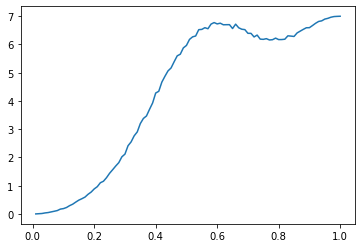

In [26]:
plt.plot(t, msd_list)

In [27]:
import pickle

with open('simulator/'+sys+'_'+name+'_counts_list.pkl','wb') as file :
    pickle.dump(counts_list, file)

In [28]:
import csv

with open('simulator/'+sys+'_'+name+'_msd_list.csv','w') as file :
    write = csv.writer(file)
    write.writerow(msd_list)